# Loss Analysis

## Imports

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import argparse
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

## Vocab

In [18]:
vocab = ''
fileName = "../data/yelp/vocabulary_yelp.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

9599

In [20]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

165683

In [24]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

164465

In [102]:
vocab = ''
fileName = "../data/yelp/vocabulary.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

16017

In [103]:
vocab = ''
fileName = "../data/yelp/vocabulary_trump_en_lower.pickle"
with open(fileName, 'rb') as fp:
    vocab = pickle.load(fp)
len(vocab)

160137

In [107]:
#new_vocab = vocab[:14412]
new_vocab = vocab[:50*len(vocab)//100] #len(vocab) - 18*len(vocab)//100
len(new_vocab)
#vocab[::-1]

14412

In [115]:
from nltk import ngrams, FreqDist
f = open("../data/yelp/full_text.txt", "r", errors="ignore")
text = f.read()
words = text.split()
freq_1_grams = FreqDist(ngrams(words, 1))
words_by_freq = freq_1_grams.most_common(len(freq_1_grams))
words_freq_atleast_5 = [word[0][0] for word in words_by_freq if word[1] >= 5]

In [118]:
len(words_freq_atleast_5), len(words_freq_atleast_5)/len(vocab)

(23969, 0.14967808813703268)

In [119]:
pickle.dump(words_freq_atleast_5, open( "../data/yelp/vocabulary_min_freq_5.pickle", "wb" ))

In [98]:
!git pull

Already up to date.


## Functions

In [123]:
def getLossesFromFile(base_path):
    i = 0
    losses = {}
    while True:
        fileName = base_path.format(i)
        print("Processing:", fileName)
        try:
            with open(fileName, 'rb') as fp:
                losses[i] = pickle.load(fp)
            i += 1
        except Exception as e:
            return losses, i

## Workflow

In [137]:
base_path = '../data/models/yelp/log/epoch_{}/losses.pickle'
output = "losses.png"

In [138]:
losses, n_epochs = getLossesFromFile(base_path)

Processing: ../data/models/yelp/log/epoch_0/losses.pickle
Processing: ../data/models/yelp/log/epoch_1/losses.pickle
Processing: ../data/models/yelp/log/epoch_2/losses.pickle
Processing: ../data/models/yelp/log/epoch_3/losses.pickle
Processing: ../data/models/yelp/log/epoch_4/losses.pickle
Processing: ../data/models/yelp/log/epoch_5/losses.pickle
Processing: ../data/models/yelp/log/epoch_6/losses.pickle
Processing: ../data/models/yelp/log/epoch_7/losses.pickle
Processing: ../data/models/yelp/log/epoch_8/losses.pickle
Processing: ../data/models/yelp/log/epoch_9/losses.pickle
Processing: ../data/models/yelp/log/epoch_10/losses.pickle


In [139]:
losses[0]

[{'reconstruction': 7.030601501464844,
  'generator': 4.577383041381836,
  'autoencoder': 11.60798454284668},
 {'reconstruction': 6.807374954223633,
  'generator': 4.16222620010376,
  'autoencoder': 10.969600677490234},
 {'reconstruction': 6.89368200302124,
  'generator': 4.399044990539551,
  'autoencoder': 11.292726516723633},
 {'reconstruction': 6.937568664550781,
  'generator': 4.6288676261901855,
  'autoencoder': 11.566436767578125},
 {'reconstruction': 6.854945659637451,
  'generator': 4.451457500457764,
  'autoencoder': 11.306403160095215},
 {'reconstruction': 6.950157165527344,
  'generator': 4.616326332092285,
  'autoencoder': 11.566483497619629},
 {'reconstruction': 6.951741695404053,
  'generator': 4.61756706237793,
  'autoencoder': 11.56930923461914},
 {'reconstruction': 6.758183002471924,
  'generator': 4.271993637084961,
  'autoencoder': 11.030176162719727},
 {'reconstruction': 7.028197288513184,
  'generator': 5.284971714019775,
  'autoencoder': 12.313169479370117},
 {'re

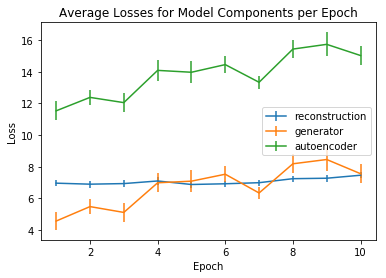

In [127]:
avgLossesById = defaultdict(list)
stdDevById = defaultdict(list)
for label in ['reconstruction', 'generator', 'autoencoder']:
    for i, epoch in losses.items():
        loss = []
        for batch in epoch:
            loss.append(float(batch[label]))
        avgLossesById[label].append(np.average(loss))
        stdDevById[label].append(np.std(loss))

# for i, epoch in losses.items():
#     loss = []
#     for batch in epoch:
#         loss.append(batch['discriminator0'] + batch['discriminator1'])
#     avgLossesById['discriminators'].append(np.average(loss))
#     stdDevById['discriminators'].append(np.std(loss))

labels = ['reconstruction', 'generator', 'autoencoder'] #'discriminators']
for label in labels:
    plt.errorbar(
        np.array(range(n_epochs)) + 1,
        avgLossesById[label],
        2 * np.array(stdDevById[label]))

plt.legend(labels, loc="best")
plt.title("Average Losses for Model Components per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig(output)

In [130]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [133]:
for i,v in losses.items(): 
    print(i)

0
1
2
3
4
5
6
7
8
9


In [134]:
avgLossesById = defaultdict(list)
stdDevById = defaultdict(list)

total_loss = np.zeros(10)
std = np.zeros(10)
for i, epoch in losses.items():
    epoch_loss = []
    for label in ['reconstruction', 'generator', 'autoencoder']:
        loss = []
        for batch in epoch:
            loss.append(float(batch[label]))
        total_loss[i] += np.average(loss)
        all_loss.
        #avgLossesById[label].append(np.average(loss))
        #stdDevById[label].append(np.std(loss))


In [136]:
total_loss

array([23.06060649, 24.75757649, 24.09687302, 28.16905603, 27.93217556,
       28.89788477, 26.66594352, 30.86024688, 31.45707921, 30.04546795])

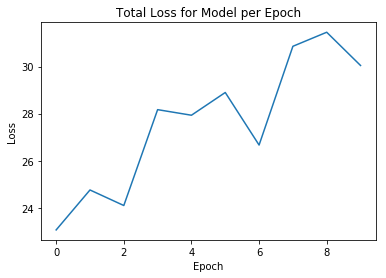

In [139]:
plt.title("Total Loss for Model per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(total_loss)
plt.show()

In [ ]:
# for i, epoch in losses.items():
#     loss = []
#     for batch in epoch:
#         loss.append(batch['discriminator0'] + batch['discriminator1'])
#     avgLossesById['discriminators'].append(np.average(loss))
#     stdDevById['discriminators'].append(np.std(loss))

labels = ['reconstruction', 'generator', 'autoencoder'] #'discriminators']
for label in labels:
    plt.errorbar(
        np.array(range(n_epochs)) + 1,
        avgLossesById[label],
        2 * np.array(stdDevById[label]))

plt.legend(labels, loc="best")
plt.title("Average Losses for Model Components per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig(output)

In [129]:
avgLossesById

defaultdict(list,
            {'autoencoder': [7.686868829948167,
              8.25252549533538,
              8.032291006914434,
              9.389685343506077,
              9.310725188297809,
              9.6326282564119,
              8.888647841047263,
              10.286748960056407,
              10.485693071402755,
              10.015155982631201],
             'reconstruction': []})